<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise

     |████████████████████████████████| 11.8MB 355kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670919 sha256=cc3612644ac59be6b23da29042733c55e44a6c726ebd405b9549d81c05e97628
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [4]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans

data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


# **Question 3.c**

In [5]:
algo = SVD(biased=False)

result_pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9460  0.9456  0.9507  0.9525  0.9509  0.9492  0.0028  
MAE (testset)     0.7460  0.7453  0.7477  0.7512  0.7486  0.7477  0.0021  
Fit time          4.68    4.67    4.73    4.71    4.70    4.70    0.02    
Test time         0.13    0.18    0.18    0.12    0.18    0.16    0.03    


In [6]:
sim_options_user_msd = {'name': 'MSD', 'user_based': True}

algo_CF_user_msd = KNNWithMeans(sim_options=sim_options_user_msd, verbose=False)

result_CF_user_msd = cross_validate(algo_CF_user_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9499  0.9567  0.9450  0.9568  0.9482  0.9513  0.0047  
MAE (testset)     0.7485  0.7530  0.7466  0.7542  0.7459  0.7496  0.0034  
Fit time          0.31    0.33    0.33    0.34    0.33    0.33    0.01    
Test time         3.53    3.56    3.59    3.50    3.61    3.56    0.04    


In [7]:
sim_options_item_msd = {'name': 'MSD', 'user_based': False}

algo_CF_item_msd = KNNWithMeans(sim_options=sim_options_item_msd, verbose=False)

result_CF_item_msd = cross_validate(algo_CF_item_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9358  0.9407  0.9293  0.9355  0.9344  0.9352  0.0036  
MAE (testset)     0.7340  0.7389  0.7299  0.7330  0.7326  0.7337  0.0029  
Fit time          0.51    0.52    0.50    0.52    0.52    0.52    0.01    
Test time         4.13    4.05    4.19    3.99    4.09    4.09    0.07    


# **Question 3.d**

[0.05131283554650157, 0.035160788604918225, 0.049152711849515085]


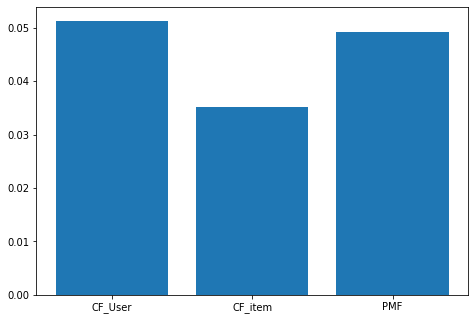

In [8]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_item_msd['test_rmse']), get_perf(result_pmf['test_rmse'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.04964186283240091, 0.03368166269443795, 0.047743180768543]


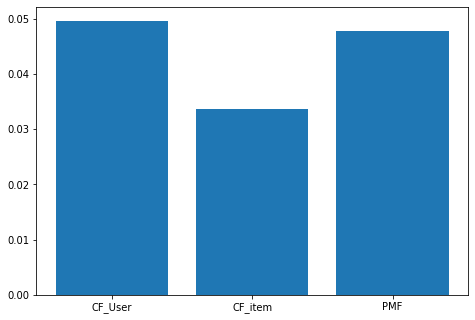

In [9]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.7)


perf_mean = [get_perf(result_CF_user_msd['test_mae']), get_perf(result_CF_item_msd['test_mae']), get_perf(result_pmf['test_mae'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.e**

In [10]:
sim_options_user = {'name': 'cosine', 'user_based': True}

algo_CF_user = KNNWithMeans(sim_options=sim_options_user, verbose=False)

result_CF_user_cosine = cross_validate(algo_CF_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9512  0.9531  0.9523  0.9607  0.9570  0.9549  0.0035  
MAE (testset)     0.7506  0.7551  0.7505  0.7590  0.7563  0.7543  0.0033  
Fit time          0.90    0.89    0.88    0.89    0.87    0.88    0.01    
Test time         3.62    3.53    3.57    3.46    3.61    3.56    0.06    


In [11]:
sim_options_item = {'name': 'cosine', 'user_based': False}

algo_CF_item = KNNWithMeans(sim_options=sim_options_item, verbose=False)

result_CF_item_cosine = cross_validate(algo_CF_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9495  0.9460  0.9370  0.9342  0.9464  0.9426  0.0059  
MAE (testset)     0.7469  0.7405  0.7398  0.7347  0.7423  0.7408  0.0039  
Fit time          1.62    1.59    1.59    1.59    1.58    1.59    0.01    
Test time         4.01    4.02    4.10    3.95    4.10    4.03    0.06    


In [12]:
sim_options_user_pearson = {'name': 'pearson_baseline', 'user_based': True}

algo_CF_user_pearson = KNNWithMeans(sim_options=sim_options_user_pearson, verbose=False)

result_CF_user_pearson = cross_validate(algo_CF_user_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9391  0.9354  0.9315  0.9413  0.9349  0.9364  0.0034  
MAE (testset)     0.7316  0.7294  0.7282  0.7292  0.7305  0.7298  0.0012  
Fit time          1.10    1.10    1.09    1.03    1.07    1.08    0.03    
Test time         3.43    3.48    3.52    3.43    3.54    3.48    0.05    


In [13]:
sim_options_item_pearson = {'name': 'pearson_baseline', 'user_based': False}

algo_CF_item_pearson = KNNWithMeans(sim_options=sim_options_item_pearson, verbose=False)

result_CF_item_pearson = cross_validate(algo_CF_item_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9280  0.9135  0.9171  0.9253  0.9222  0.9212  0.0053  
MAE (testset)     0.7253  0.7152  0.7170  0.7219  0.7212  0.7201  0.0036  
Fit time          1.62    1.52    1.49    1.49    1.51    1.53    0.05    
Test time         3.89    3.94    3.86    3.91    3.97    3.91    0.04    


[0.05131283554650157, 0.05488003200748515, 0.03644758500427214]


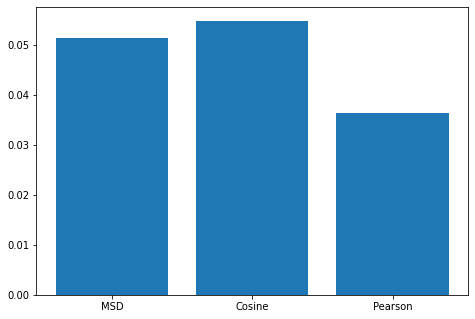

In [14]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_user_cosine['test_rmse']), get_perf(result_CF_user_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.035160788604918225, 0.042621713133736416, 0.021199642584260103]


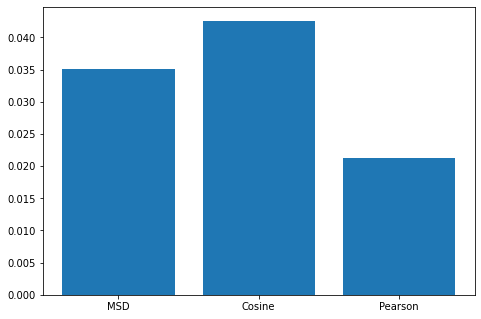

In [15]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_item_msd['test_rmse']), get_perf(result_CF_item_cosine['test_rmse']), get_perf(result_CF_item_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.04964186283240091, 0.054277548107998896, 0.029770903852720854]


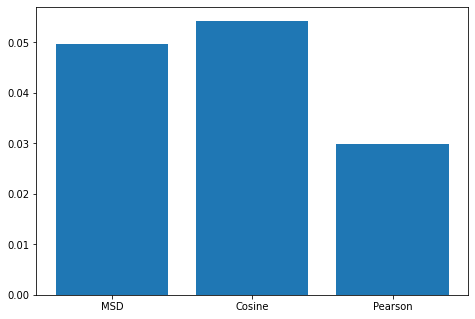

In [20]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.7)


perf_mean = [get_perf(result_CF_user_msd['test_mae']), get_perf(result_CF_user_cosine['test_mae']), get_perf(result_CF_user_pearson['test_mae'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.03368166269443795, 0.0408418472799682, 0.020123654854843465]


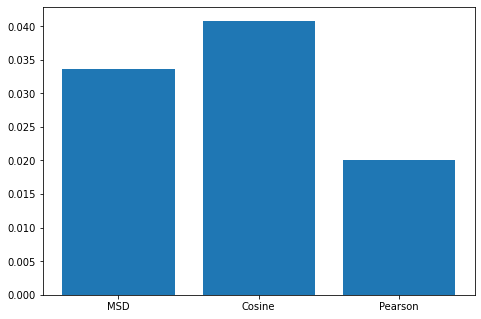

In [21]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.7)


perf_mean = [get_perf(result_CF_item_msd['test_mae']), get_perf(result_CF_item_cosine['test_mae']), get_perf(result_CF_item_pearson['test_mae'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.f**

K :  5
RMSE: 1.0179
K :  10
RMSE: 0.9827
K :  15
RMSE: 0.9715
K :  20
RMSE: 0.9645
K :  25
RMSE: 0.9614
K :  30
RMSE: 0.9595
K :  35
RMSE: 0.9582
K :  40
RMSE: 0.9579
K :  45
RMSE: 0.9574
K :  50
RMSE: 0.9574
K :  55
RMSE: 0.9573
K :  60
RMSE: 0.9574
K :  65
RMSE: 0.9576
K :  70
RMSE: 0.9577
K :  75
RMSE: 0.9577
K :  80
RMSE: 0.9581
K :  85
RMSE: 0.9584
K :  90
RMSE: 0.9585
K :  95
RMSE: 0.9587
K :  100
RMSE: 0.9589
K :  105
RMSE: 0.9590
K :  110
RMSE: 0.9592
K :  115
RMSE: 0.9595
K :  120
RMSE: 0.9597
K :  125
RMSE: 0.9599
K :  130
RMSE: 0.9600
K :  135
RMSE: 0.9602
K :  140
RMSE: 0.9604
K :  145
RMSE: 0.9605
K :  150
RMSE: 0.9607


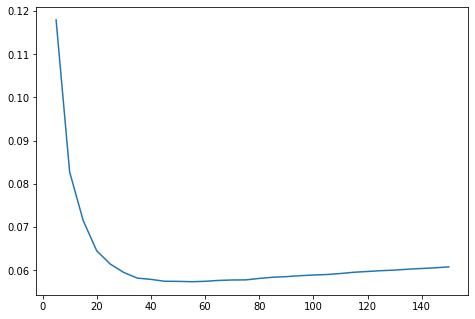

In [22]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_user = []
k = [x*5 for x in range(1, 31)]

for input_k in k:
  print("K : ", input_k)
  algo = KNNWithMeans(k=input_k, sim_options=sim_options_user_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_user.append((accuracy.rmse(predictions)-0.9))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,results_k_user)
plt.show()

K :  5
RMSE: 1.0143
K :  10
RMSE: 0.9727
K :  15
RMSE: 0.9590
K :  20
RMSE: 0.9508
K :  25
RMSE: 0.9468
K :  30
RMSE: 0.9447
K :  35
RMSE: 0.9430
K :  40
RMSE: 0.9417
K :  45
RMSE: 0.9411
K :  50
RMSE: 0.9406
K :  55
RMSE: 0.9405
K :  60
RMSE: 0.9406
K :  65
RMSE: 0.9410
K :  70
RMSE: 0.9412
K :  75
RMSE: 0.9411
K :  80
RMSE: 0.9412
K :  85
RMSE: 0.9413
K :  90
RMSE: 0.9417
K :  95
RMSE: 0.9420
K :  100
RMSE: 0.9423
K :  105
RMSE: 0.9427
K :  110
RMSE: 0.9429
K :  115
RMSE: 0.9431
K :  120
RMSE: 0.9433
K :  125
RMSE: 0.9436
K :  130
RMSE: 0.9438
K :  135
RMSE: 0.9441
K :  140
RMSE: 0.9443
K :  145
RMSE: 0.9445
K :  150
RMSE: 0.9446


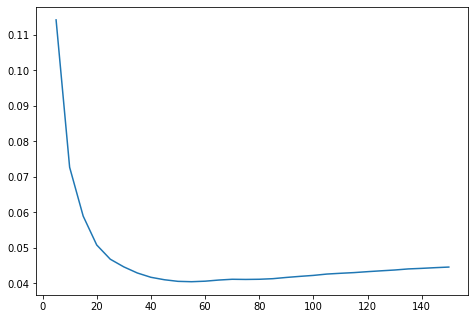

In [23]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_item = []
k = [x*5 for x in range(1, 31)]

for input_k in k:
  print("K : ", input_k)

  algo = KNNWithMeans(k=input_k, sim_options=sim_options_item_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_item.append((accuracy.rmse(predictions)-0.9))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, results_k_item)
plt.show()

K :  5
MAE:  0.8001
K :  10
MAE:  0.7724
K :  15
MAE:  0.7619
K :  20
MAE:  0.7571
K :  25
MAE:  0.7550
K :  30
MAE:  0.7538
K :  35
MAE:  0.7532
K :  40
MAE:  0.7527
K :  45
MAE:  0.7524
K :  50
MAE:  0.7520
K :  55
MAE:  0.7520
K :  60
MAE:  0.7521
K :  65
MAE:  0.7519
K :  70
MAE:  0.7522
K :  75
MAE:  0.7522
K :  80
MAE:  0.7523
K :  85
MAE:  0.7524
K :  90
MAE:  0.7525
K :  95
MAE:  0.7526
K :  100
MAE:  0.7528
K :  105
MAE:  0.7529
K :  110
MAE:  0.7531
K :  115
MAE:  0.7533
K :  120
MAE:  0.7534
K :  125
MAE:  0.7535
K :  130
MAE:  0.7537
K :  135
MAE:  0.7538
K :  140
MAE:  0.7539
K :  145
MAE:  0.7540
K :  150
MAE:  0.7542


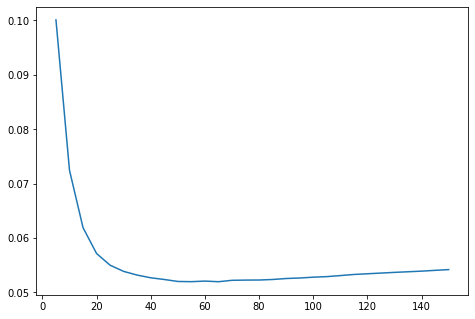

In [26]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_user = []
k = [x*5 for x in range(1, 31)]

for input_k in k:
  print("K : ", input_k)
  algo = KNNWithMeans(k=input_k, sim_options=sim_options_user_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_user.append((accuracy.mae(predictions)-0.7))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,results_k_user)
plt.show()

K :  5
MAE:  0.7947
K :  10
MAE:  0.7618
K :  15
MAE:  0.7490
K :  20
MAE:  0.7437
K :  25
MAE:  0.7401
K :  30
MAE:  0.7385
K :  35
MAE:  0.7368
K :  40
MAE:  0.7363
K :  45
MAE:  0.7358
K :  50
MAE:  0.7360
K :  55
MAE:  0.7359
K :  60
MAE:  0.7360
K :  65
MAE:  0.7361
K :  70
MAE:  0.7362
K :  75
MAE:  0.7362
K :  80
MAE:  0.7366
K :  85
MAE:  0.7369
K :  90
MAE:  0.7371
K :  95
MAE:  0.7375
K :  100
MAE:  0.7378
K :  105
MAE:  0.7383
K :  110
MAE:  0.7386
K :  115
MAE:  0.7388
K :  120
MAE:  0.7390
K :  125
MAE:  0.7392
K :  130
MAE:  0.7395
K :  135
MAE:  0.7397
K :  140
MAE:  0.7399
K :  145
MAE:  0.7401
K :  150
MAE:  0.7402


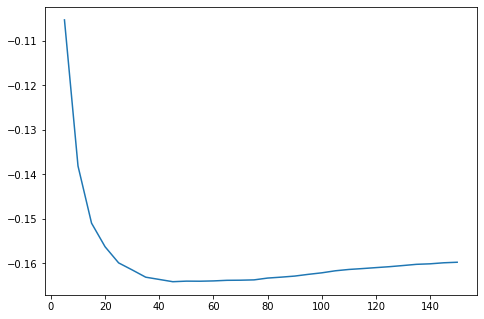

In [27]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_item = []
k = [x*5 for x in range(1, 31)]

for input_k in k:
  print("K : ", input_k)

  algo = KNNWithMeans(k=input_k, sim_options=sim_options_item_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_item.append((accuracy.mae(predictions)-0.9))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, results_k_item)
plt.show()

# **Question 3.g**

In [24]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 31)]

param_grid_user = {'k': k,
              'sim_options': {'user_based': [True]},
              'verbose' : [False]
              }

gs_user = GridSearchCV(KNNWithMeans, param_grid_user, measures=['rmse'], cv=3)

gs_user.fit(data)

print(gs_user.best_score['rmse'])
print(gs_user.best_params['rmse'])

0.9571183991720537
{'k': 60, 'sim_options': {'user_based': True}, 'verbose': False}


In [25]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 31)]
param_grid_item = {'k': k,
              'sim_options': {'user_based': [False]},
              'verbose' : [False]
              }

gs_item = GridSearchCV(KNNWithMeans, param_grid_item, measures=['rmse', 'mae'], cv=3)

gs_item.fit(data)

print(gs_item.best_score['rmse'])
print(gs_item.best_params['rmse'])

0.9407320911530483
{'k': 60, 'sim_options': {'user_based': False}, 'verbose': False}
